In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("Demand_Forecasting_Monthly_Data.xlsx")

In [3]:
df.drop('Data',axis=1,inplace=True)

In [4]:
df.head(10)

,Orders_Date,Sales_Volume
0,2020-02-01,376832
1,2020-03-01,481754
2,2020-04-01,240192
3,2020-05-01,138704
4,2020-06-01,193440
5,2020-07-01,321818
6,2020-08-01,202245
7,2020-09-01,313422
8,2020-10-01,396599
9,2020-11-01,377673


In [5]:
df.describe()

,Orders_Date,Sales_Volume
count,51,51.000000
mean,2022-03-02 01:24:42.352941056,324013.058824
min,2020-02-01 00:00:00,138704.000000
25%,2021-02-15 00:00:00,267001.000000
50%,2022-03-01 00:00:00,321571.000000
75%,2023-03-16 12:00:00,388361.500000
max,2024-04-01 00:00:00,481754.000000
std,NaN,85455.930639


In [6]:
df.columns

Index(['Orders_Date', 'Sales_Volume'], dtype='object')

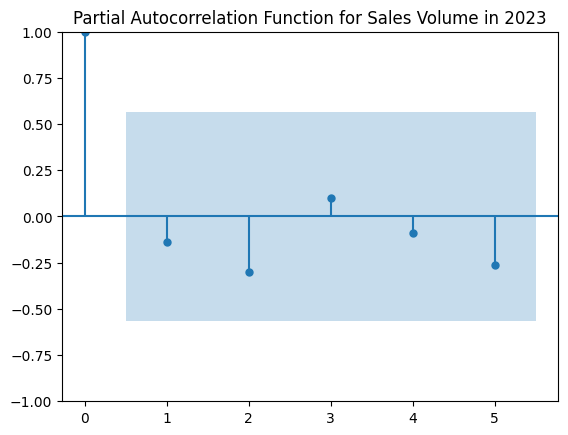

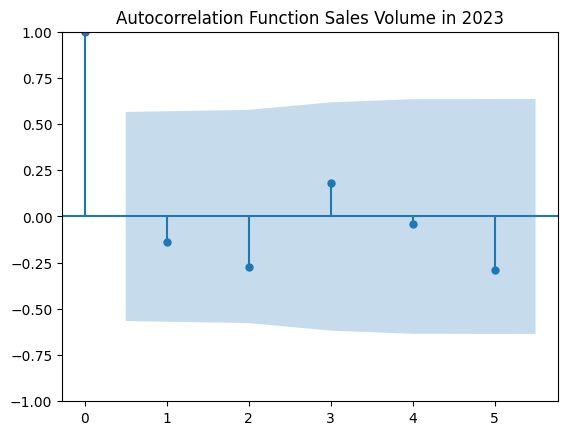

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

df_2023 = df[df['Orders_Date'].dt.year == 2023]

df_2023 = df_2023.sort_values(by='Orders_Date')

pacf = plot_pacf(df_2023['Sales_Volume'], lags=5)
plt.title('Partial Autocorrelation Function for Sales Volume in 2023')
plt.show()

acf = plot_acf(df_2023['Sales_Volume'], lags=5)
plt.title('Autocorrelation Function Sales Volume in 2023')
plt.show()

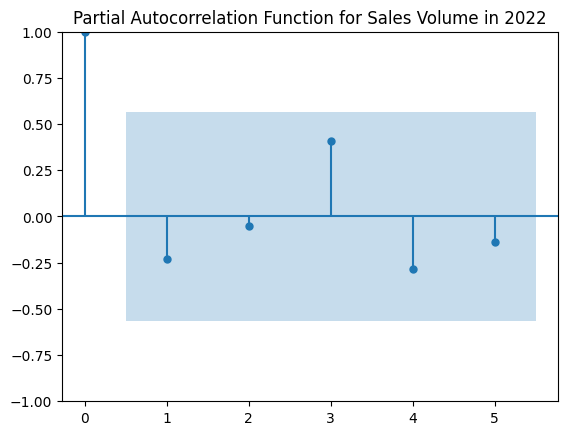

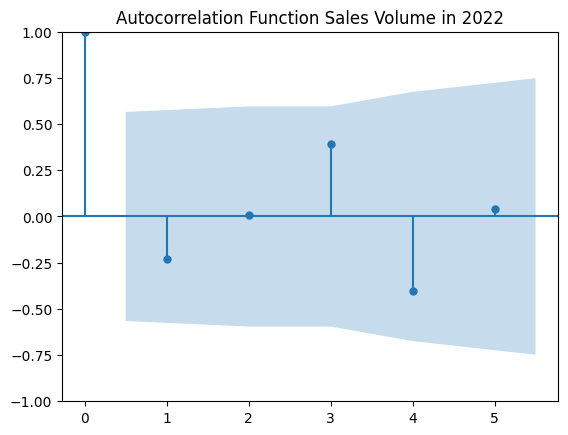

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

df_2022 = df[df['Orders_Date'].dt.year == 2022]

df_2022 = df_2022.sort_values(by='Orders_Date')

pacf = plot_pacf(df_2022['Sales_Volume'], lags=5)
plt.title('Partial Autocorrelation Function for Sales Volume in 2022')
plt.show()

acf = plot_acf(df_2022['Sales_Volume'], lags=5)
plt.title('Autocorrelation Function Sales Volume in 2022')
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller

# Assuming df is your DataFrame
dftest = adfuller(df['Sales_Volume'], autolag='AIC')

print("P-Value_ADF: ", dftest[1])

P-Value_ADF:  0.29203548147636466


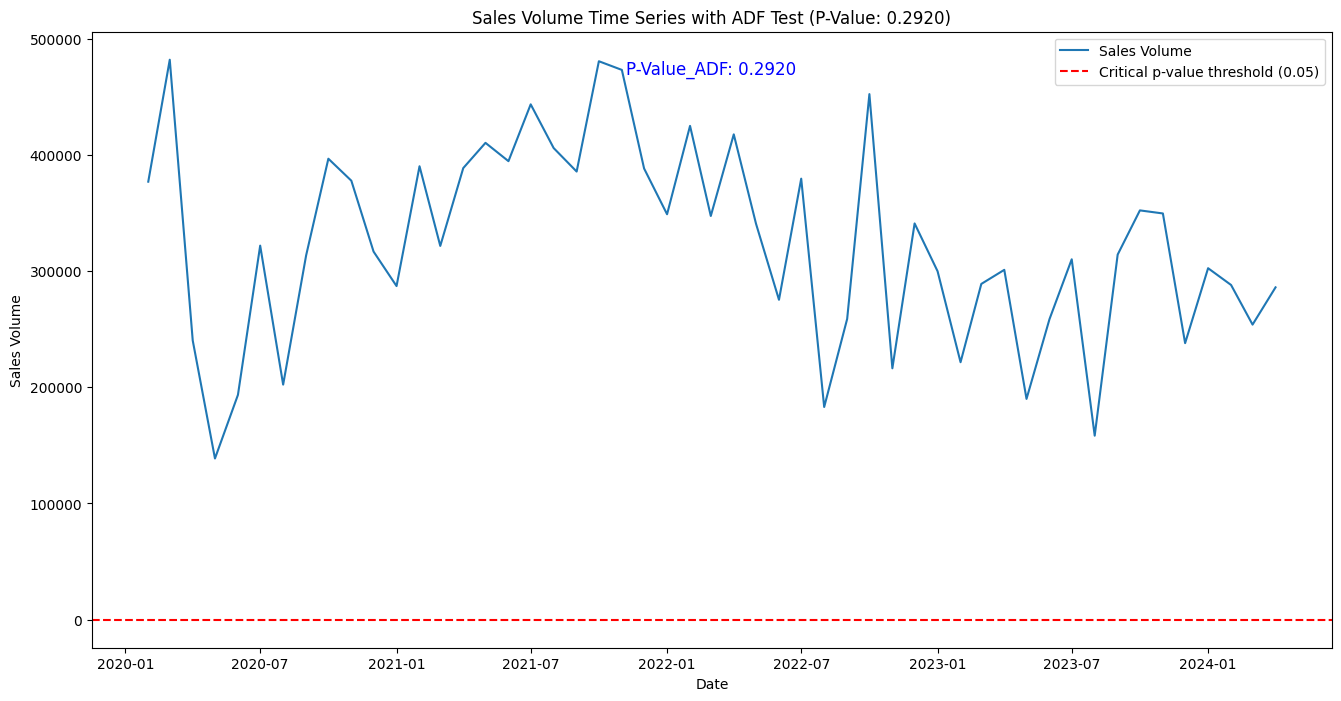

In [10]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['Sales_Volume'], autolag='AIC')

p_value_adf = dftest[1]

plt.figure(figsize=(16, 8))
plt.plot(df['Orders_Date'], df['Sales_Volume'], label='Sales Volume')

plt.axhline(y=0.05, color='r', linestyle='--', label='Critical p-value threshold (0.05)')


plt.text(df['Orders_Date'].iloc[int(len(df)/2)], df['Sales_Volume'].max(), f'P-Value_ADF: {p_value_adf:.4f}', 
         color='blue', fontsize=12, verticalalignment='top', horizontalalignment='center')


plt.title(f'Sales Volume Time Series with ADF Test (P-Value: {p_value_adf:.4f})')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.legend()

plt.show()

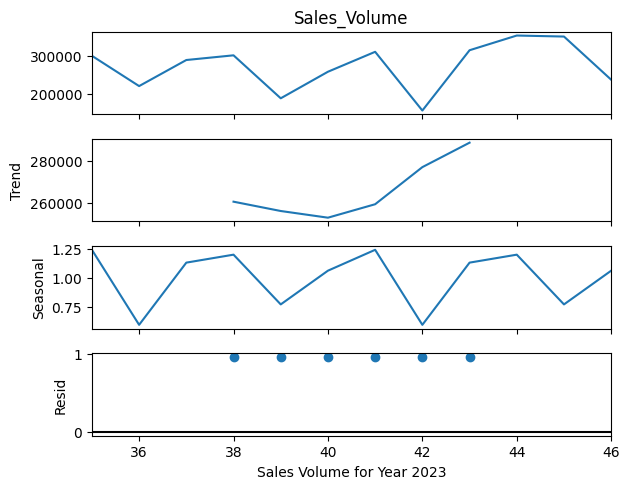

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df_2023 = df[df['Orders_Date'].dt.year == 2023]

df_2023 = df_2023.sort_values(by='Orders_Date')

decompose_result = seasonal_decompose(df_2023['Sales_Volume'], model='multiplicative', period=6)

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot()
plt.xlabel('Sales Volume for Year 2023')
plt.show()

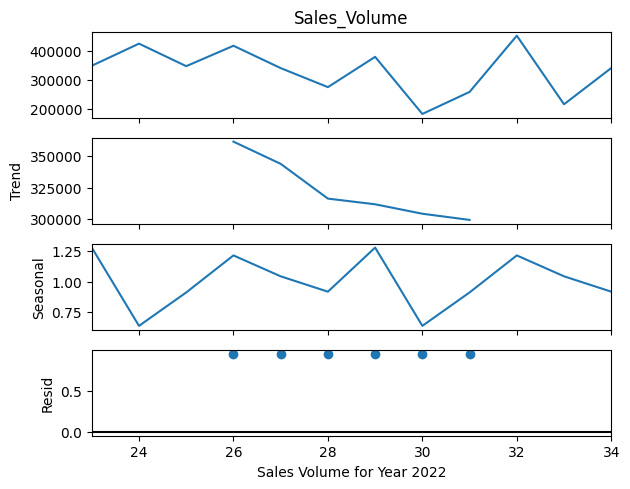

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df_2022 = df[df['Orders_Date'].dt.year == 2022]

df_2022 = df_2022.sort_values(by='Orders_Date')

decompose_result = seasonal_decompose(df_2022['Sales_Volume'], model='multiplicative', period=6)

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot()
plt.xlabel('Sales Volume for Year 2022')
plt.show()

In [13]:
df.set_index('Orders_Date',inplace=True)

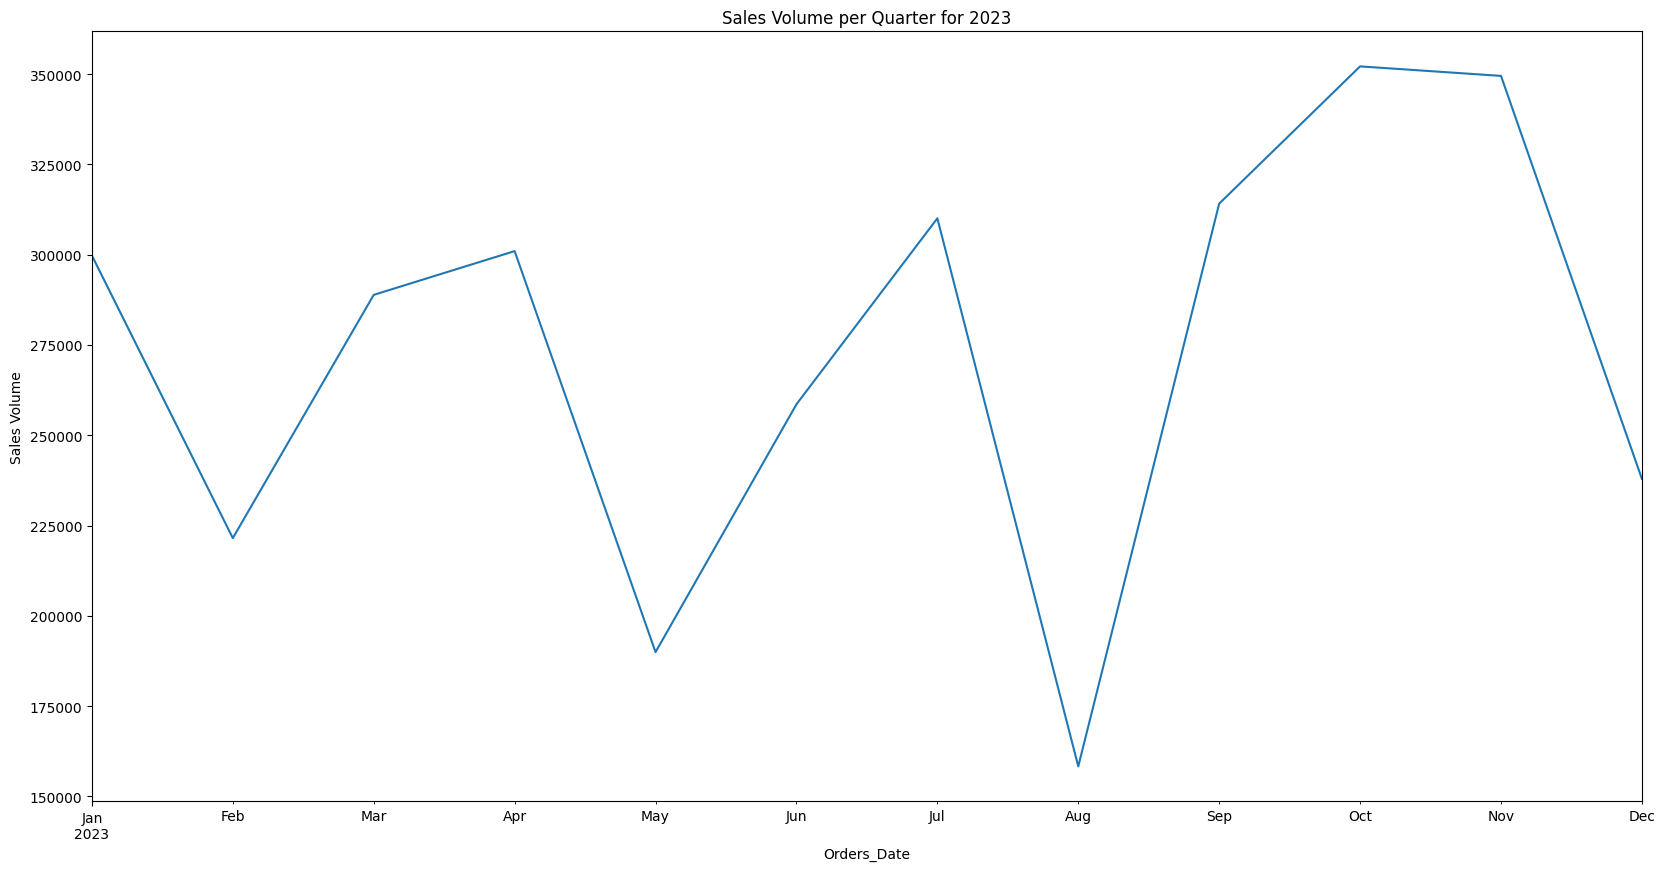

In [14]:
df_2023 = df.loc['2023']

df_2023['Sales_Volume'].plot(figsize=(20, 10))
plt.title("Sales Volume per Quarter for 2023")
plt.xlabel('Orders_Date')
plt.ylabel('Sales Volume')
plt.show()

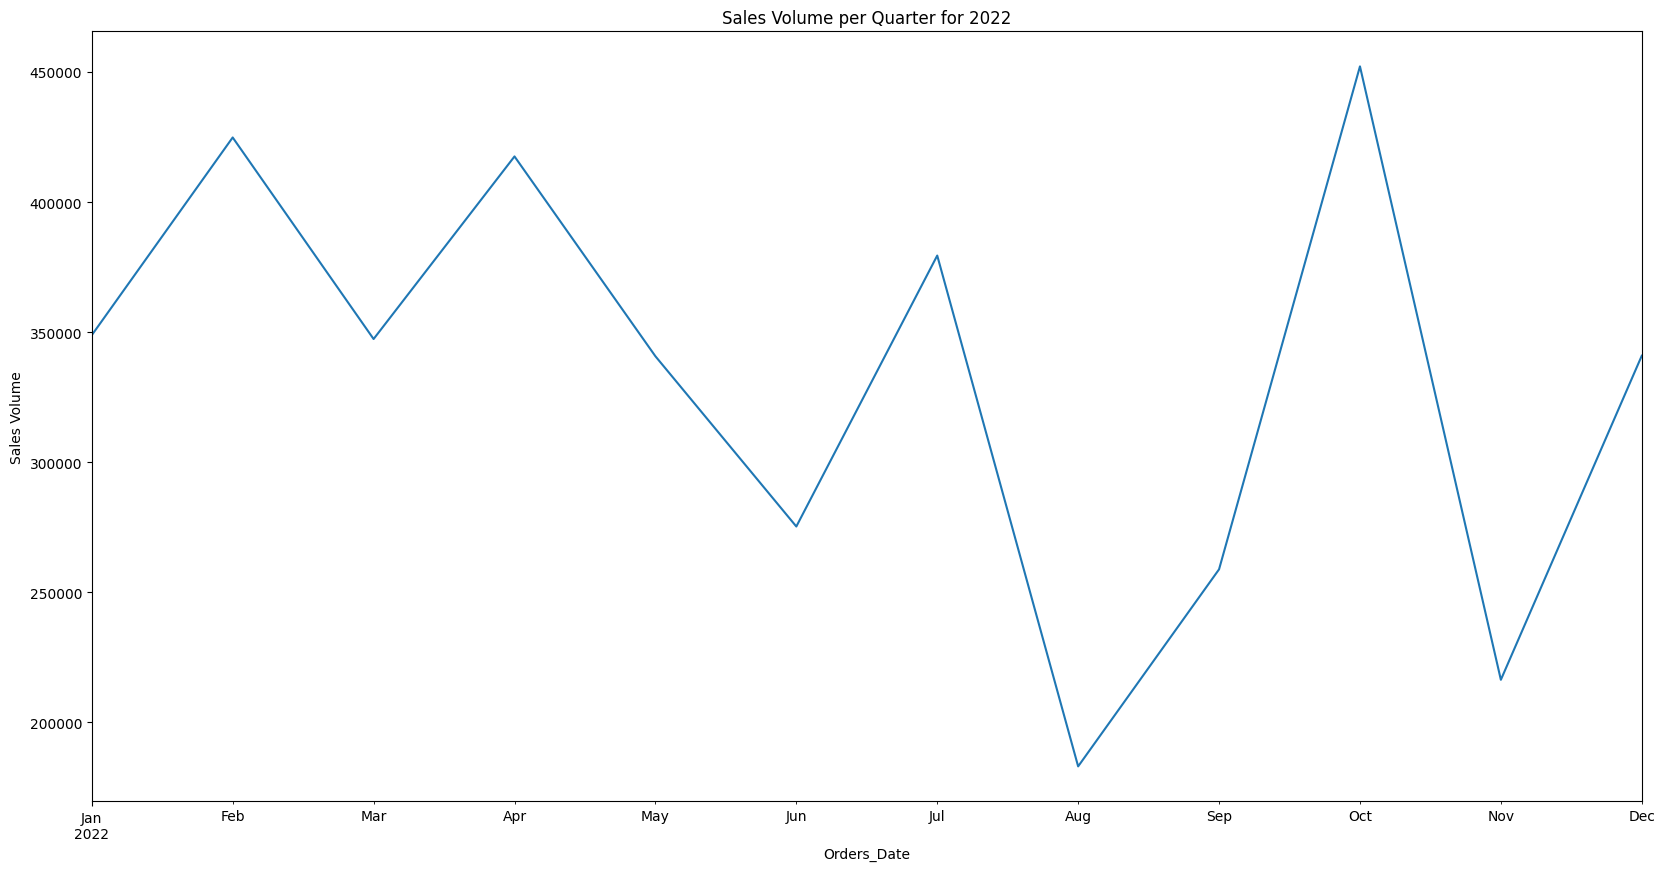

In [15]:
df_2022 = df.loc['2022']

df_2022['Sales_Volume'].plot(figsize=(20, 10))
plt.title("Sales Volume per Quarter for 2022")
plt.xlabel('Orders_Date')
plt.ylabel('Sales Volume')
plt.show()